# 1 Generalization error

泛化误差

样本复杂度参考: [LFD第二章笔记:泛化边界与测试集 · Anifacc](https://anifacc.github.io/machinelearning/learningfromdata/2017/08/31/lfd-ch02-generalization-bound-interpretion-test-set/) 公式 2.13

$$N \geq \frac{8}{\epsilon ^ 2} \ln \frac{4 [(2N)^d + 1]}{\delta}$$

In [1]:
# q1

d = 10
epsilon = 0.05 # error 
delta = 0.05

In [2]:
from math import log

def decide(d, epsilon, delta):
    N = [400000, 420000, 440000, 460000, 480000]
    
    for n in N:
        equation_right = 8 / (epsilon ** 2) * log((4 * ((2 * n) ** d + 1))/ delta)
        
        while N >= equation_right:
            print("{} is the smallest".format(n))
            break

In [3]:
decide(d, epsilon, delta)

400000 is the smallest
420000 is the smallest
440000 is the smallest
460000 is the smallest
480000 is the smallest


so choose [a] = 400, 000

D:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in power
D:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in power


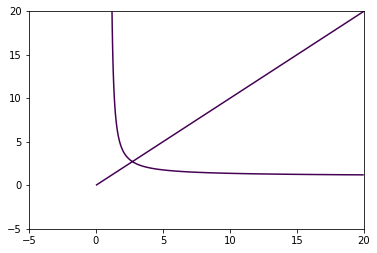

In [4]:
# test
import matplotlib.pyplot
from numpy import arange
from numpy import meshgrid

delta = 0.025
xrange = arange(-5.0, 20.0, delta)
yrange = arange(-5.0, 20.0, delta)
X, Y = meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = Y**X
G = X**Y

matplotlib.pyplot.contour(X, Y, (F - G), [0])
matplotlib.pyplot.show()

In [5]:
%matplotlib inline

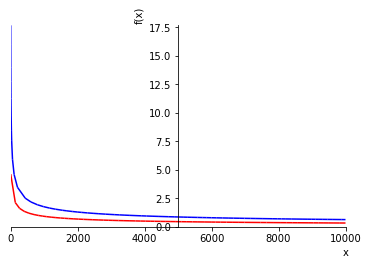

In [6]:
# q2
from sympy import symbols, ln, sqrt
from sympy.plotting import plot

import numpy as np

d_vc = 50
delta = 0.05

n = symbols('n')

# Original VC bound
expr1 = sqrt(float(8)/n * ln(4 * (2*n)**d_vc / delta))
range1 = (n, 1, 10000)

# Rademacher Penalty Bound
expr2 = sqrt(2 * ln(2 * n * n**d_vc) / n) + sqrt(float(2)/n * ln(1/delta)) + float(1)/n
range2 = (n, 1, 10000)

temp1 = (expr1, range1)
temp2 = (expr2, range2)

e = symbols('e')
# Parroondo and Vand den Broek
expr3 = sqrt(float(1)/n * (2 * e + ln(6 * (2*n)**d_vc / delta)))
temp3 = (expr3, range1)

# Devroye
expr4 = sqrt(float(1)/(2*n) * (4 * e * (1+e) + ln(4 * (n**2)**d_vc / delta )))
temp4 = (expr4, range1)

# original bound
p1 = plot(temp1, temp2, show=False)
p1[0].line_color = 'blue'
p1[1].line_color = 'red'
p1.show()

参考:

[sympy – changing graph color of plot() | Freedom, World peace in unity!](https://butterflyofdream.wordpress.com/2014/02/01/sympy-changing-the-graph-color-of-plot/)

In [7]:
from sympy import symbols, ln, sqrt
from sympy.plotting import plot_implicit

In [8]:
d_vc = 50
delta = 0.05

n = symbols('n')
e = symbols('e')
range1 = (n, 1, 1000)
e_range = (e, 0, 15)

# Original VC bound
expr1 = sqrt(float(8)/n * ln(4 * (2*n)**d_vc / delta))
temp1 = (e-expr1, range1, e_range)

# Rademacher Penalty Bound
expr2 = sqrt(2 * ln(2 * n * n**d_vc) / n) + sqrt(float(2)/n * ln(1/delta)) + float(1)/n
temp2 = (e-expr2, range1, e_range)

# Parroondo and Vand den Broek
expr3 = sqrt(float(1)/n * (2 * e + ln(6 * (2*n)**d_vc / delta)))
temp3 = (e-expr3, range1, e_range)

# Devroye
expr4 = sqrt(float(1)/(2*n) * (4 * e * (1+e) + ln(4 * (n**2)**d_vc / delta )))
temp4 = (e-expr4, range1, e_range)

p1 = plot_implicit(e-expr1, range1, e_range, show=False)
p2 = plot_implicit(e-expr2, range1, e_range, show=False)
p3 = plot_implicit(e-expr3, range1, e_range, show=False)
p4 = plot_implicit(e-expr4, range1, e_range, show=False)

# p = plot_implicit(e-expr1, range1, e_range)
# fig = p._backend.fig
# ax = p._backend.ax

## Plot in the same figure

[python - Plotting 2 or more functions in the same graph - Stack Overflow](https://stackoverflow.com/questions/19932072/plotting-2-or-more-functions-in-the-same-graph)

In [9]:
from sympy import Or
p = p1.extend(p2, p3, p4)

TypeError: extend() takes exactly 2 arguments (4 given)

In [ ]:
p1.extend(p2)
p1.show()

In [ ]:
from sympy import Or
plot_implicit(Or(e-expr1, e-expr2, e-expr3, e-expr4))

[Plotting Module — SymPy 1.1.1 documentation](http://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.Plot.append)

In [10]:
p1_copy = p1

In [11]:
p1.append(p2[0])

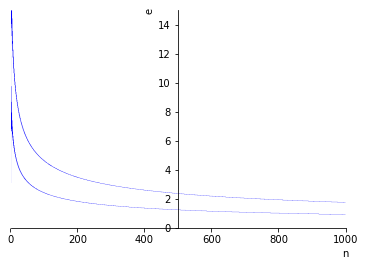

In [12]:
p1.show()

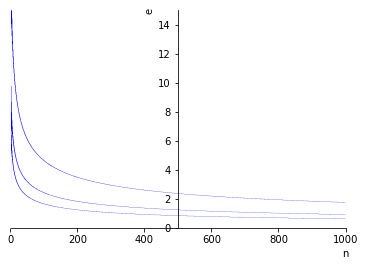

In [13]:
p1.append(p3[0])
p1.show()

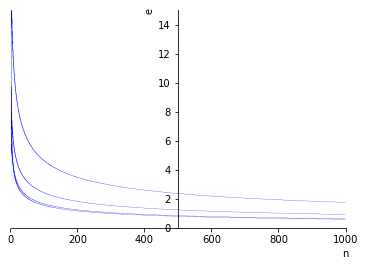

In [14]:
p1.append(p4[0])
p1.show()

In [15]:
p1[0].line_color = 'black'
p1[1].line_color = 'green'
p1[2].line_color = 'blue'
p1[3].line_color = 'red'

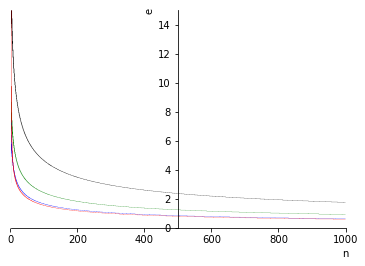

In [16]:
p1.show()

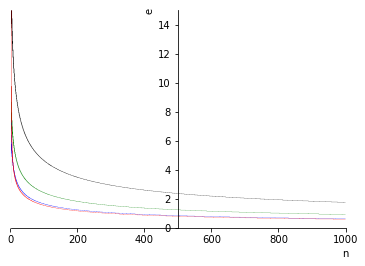

In [17]:
p1[0].title = 'A-Original'
p1[1].title = 'B-Rad'
p1[2].title = 'C-Par'
p1[3].title = 'D-Dev'

p1.show()

# so choose (c) Parrondo

In [ ]:
p1

In [18]:
p1 = plot_implicit(e-expr1, range1, e_range, show=False)
p2 = plot_implicit(e-expr2, range1, e_range, show=False)
p3 = plot_implicit(e-expr3, range1, e_range, show=False)
p4 = plot_implicit(e-expr4, range1, e_range, show=False)

In [19]:
p1.extend(p2)
p1.extend(p3)
p1.extend(p4)

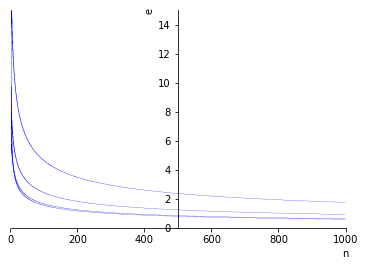

In [20]:
p1.show()

# Q3

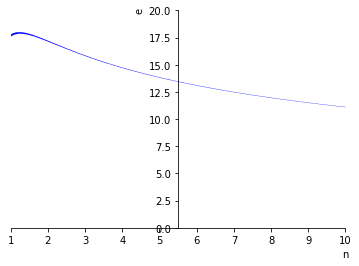

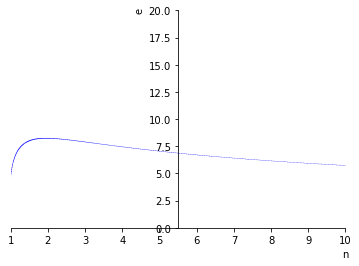

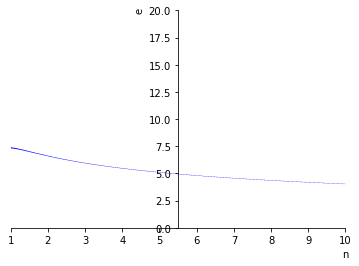

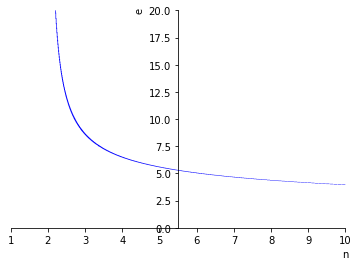

In [21]:
small_n = (n, 1, 10)
e_range = (e, 0, 20)

pp1 = plot_implicit(e-expr1, small_n, e_range)
pp2 = plot_implicit(e-expr2, small_n, e_range)
pp3 = plot_implicit(e-expr3, small_n, e_range)
pp4 = plot_implicit(e-expr4, small_n, e_range)

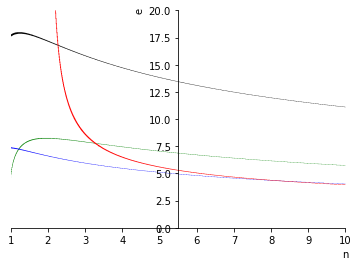

In [22]:
pp1.append(pp2[0])
pp1.append(pp3[0])
pp1.append(pp4[0])

pp1[0].line_color = 'black'
pp1[1].line_color = 'green'
pp1[2].line_color = 'blue'
pp1[3].line_color = 'red'

pp1.show()

# Q3

可以看出 在 N = 5 时, "blue" 色的 e 最小. so choose (C)